# 1일차 Review : 같은 문제 다시 풀어보기

    학습은 10번으로!

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
x = iris.data
y = iris.target

In [4]:
x.shape, y.shape

((150, 4), (150,))

In [5]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [6]:
#######################
# 어떤 전처리 작업 필요
# Hint : y.shape
#######################
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 3)
y.shape

(150, 3)

In [7]:
# 훈련, 테스트 데이터 분류
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

In [8]:
########
# 모델링
########
# 1. 모델 초기화
keras.backend.clear_session()

# 2. 레이어 생성
input_layer = keras.layers.Input(shape=(4,))
output_layer = keras.layers.Dense(3, activation='softmax')(input_layer)

# 3. 모델 생성
model = keras.models.Model(input_layer, output_layer)

# 4. 모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [11]:
###########
# 모델 학습
###########
model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
3/3 [==============================] - 0s 121ms/step - loss: 2.1843 - accuracy: 0.3229 - val_loss: 1.9271 - val_accuracy: 0.4167
Epoch 2/10
3/3 [==============================] - 0s 19ms/step - loss: 2.1376 - accuracy: 0.3229 - val_loss: 1.8924 - val_accuracy: 0.4167
Epoch 3/10
3/3 [==============================] - 0s 22ms/step - loss: 2.0902 - accuracy: 0.3229 - val_loss: 1.8586 - val_accuracy: 0.4167
Epoch 4/10
3/3 [==============================] - 0s 21ms/step - loss: 2.0458 - accuracy: 0.3021 - val_loss: 1.8258 - val_accuracy: 0.4167
Epoch 5/10
3/3 [==============================] - 0s 21ms/step - loss: 2.0017 - accuracy: 0.3021 - val_loss: 1.7944 - val_accuracy: 0.3750
Epoch 6/10
3/3 [==============================] - 0s 22ms/step - loss: 1.9597 - accuracy: 0.3021 - val_loss: 1.7640 - val_accuracy: 0.3750
Epoch 7/10
3/3 [==============================] - 0s 21ms/step - loss: 1.9179 - accuracy: 0.3021 - val_loss: 1.7355 - val_accuracy: 0.3333
Epoch 8/10
3/3 [==========

In [12]:
###########
# 모델 예측
###########
y_pred = model.predict(x_test)
print(y_pred[:5])
print(y_test[:5])

[[0.7827563  0.15084419 0.06639951]
 [0.8911096  0.08260234 0.0262881 ]
 [0.5374147  0.17117348 0.29141176]
 [0.7529528  0.15346484 0.09358238]
 [0.48256484 0.17050329 0.3469318 ]]
[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


# 히든 레이어 추가하여 모델링! (Functional API)

    히든 레이어 2개를 추가하여 다시 모델링!
    히든 레이어 노드 수 : 32
    히든 레이어 activation = 'relu'

In [29]:
########
# 모델링
########
# 1. 모델 초기화
keras.backend.clear_session()

# 2. 레이어 생성
input_layer = keras.layers.Input(shape=(4,))
hiden_layer = keras.layers.Dense(32, activation='relu')(input_layer)
hiden_layer = keras.layers.Dense(32, activation='relu')(hiden_layer)
output_layer = keras.layers.Dense(3, activation='softmax')(hiden_layer)

# 3. 모델 생성
model = keras.models.Model(input_layer, output_layer)

# 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], optimizer=keras.optimizers.Adam())

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [30]:
## Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss',       # 무엇을 관찰할래?
                   min_delta=0,              # 0이면 최소한 나빠지지만 않으면 괜찮아
                   patience=5,               # mointer가 개선되지 않는 거를 몇 번 참을래?
                   verbose=1,                # Early Stopping 된 것을 보여줍니다.
                   restore_best_weights=True # 중요! 최적의 학습 가중치를 모델에 전달합니다.
                  )

In [31]:
###########
# 모델 학습
###########
hist = model.fit(x_train, y_train, epochs=200, validation_split=0.2, callbacks=[es])


Epoch 1/200
3/3 [==============================] - 1s 127ms/step - loss: 1.0868 - accuracy: 0.2292 - val_loss: 1.1204 - val_accuracy: 0.2917
Epoch 2/200
3/3 [==============================] - 0s 22ms/step - loss: 1.0725 - accuracy: 0.1771 - val_loss: 1.1123 - val_accuracy: 0.1667
Epoch 3/200
3/3 [==============================] - 0s 24ms/step - loss: 1.0554 - accuracy: 0.3229 - val_loss: 1.0966 - val_accuracy: 0.2083
Epoch 4/200
3/3 [==============================] - 0s 23ms/step - loss: 1.0421 - accuracy: 0.3333 - val_loss: 1.0764 - val_accuracy: 0.2083
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - loss: 1.0297 - accuracy: 0.3333 - val_loss: 1.0589 - val_accuracy: 0.2500
Epoch 6/200
3/3 [==============================] - 0s 28ms/step - loss: 1.0189 - accuracy: 0.3438 - val_loss: 1.0446 - val_accuracy: 0.2083
Epoch 7/200
3/3 [==============================] - 0s 25ms/step - loss: 1.0057 - accuracy: 0.3333 - val_loss: 1.0291 - val_accuracy: 0.2500
Epoch 8/200
3/3 [==

3/3 [==============================] - 0s 24ms/step - loss: 0.2778 - accuracy: 0.9792 - val_loss: 0.2645 - val_accuracy: 0.9583
Epoch 60/200
3/3 [==============================] - 0s 25ms/step - loss: 0.2710 - accuracy: 0.9792 - val_loss: 0.2604 - val_accuracy: 0.9583
Epoch 61/200
3/3 [==============================] - 0s 21ms/step - loss: 0.2645 - accuracy: 0.9792 - val_loss: 0.2537 - val_accuracy: 0.9583
Epoch 62/200
3/3 [==============================] - 0s 21ms/step - loss: 0.2591 - accuracy: 0.9792 - val_loss: 0.2465 - val_accuracy: 0.9583
Epoch 63/200
3/3 [==============================] - 0s 21ms/step - loss: 0.2523 - accuracy: 0.9792 - val_loss: 0.2420 - val_accuracy: 0.9583
Epoch 64/200
3/3 [==============================] - 0s 23ms/step - loss: 0.2460 - accuracy: 0.9792 - val_loss: 0.2380 - val_accuracy: 0.9583
Epoch 65/200
3/3 [==============================] - 0s 24ms/step - loss: 0.2405 - accuracy: 0.9792 - val_loss: 0.2332 - val_accuracy: 0.9583
Epoch 66/200
3/3 [========

3/3 [==============================] - 0s 23ms/step - loss: 0.0999 - accuracy: 0.9792 - val_loss: 0.1039 - val_accuracy: 1.0000
Epoch 118/200
3/3 [==============================] - 0s 19ms/step - loss: 0.0989 - accuracy: 0.9792 - val_loss: 0.1030 - val_accuracy: 1.0000
Epoch 119/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0984 - accuracy: 0.9792 - val_loss: 0.1019 - val_accuracy: 1.0000
Epoch 120/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0971 - accuracy: 0.9792 - val_loss: 0.1014 - val_accuracy: 0.9583
Epoch 121/200
3/3 [==============================] - 0s 23ms/step - loss: 0.0967 - accuracy: 0.9792 - val_loss: 0.1005 - val_accuracy: 0.9583
Epoch 122/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0960 - accuracy: 0.9792 - val_loss: 0.0990 - val_accuracy: 1.0000
Epoch 123/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0946 - accuracy: 0.9896 - val_loss: 0.0983 - val_accuracy: 1.0000
Epoch 124/200
3/3 [=

Epoch 175/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0675 - accuracy: 0.9896 - val_loss: 0.0697 - val_accuracy: 1.0000
Epoch 176/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0655 - accuracy: 0.9896 - val_loss: 0.0688 - val_accuracy: 1.0000
Epoch 177/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0652 - accuracy: 0.9896 - val_loss: 0.0684 - val_accuracy: 1.0000
Epoch 178/200
3/3 [==============================] - 0s 21ms/step - loss: 0.0659 - accuracy: 0.9792 - val_loss: 0.0686 - val_accuracy: 0.9583
Epoch 179/200
3/3 [==============================] - 0s 20ms/step - loss: 0.0655 - accuracy: 0.9792 - val_loss: 0.0677 - val_accuracy: 1.0000
Epoch 180/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0649 - accuracy: 0.9792 - val_loss: 0.0674 - val_accuracy: 1.0000
Epoch 181/200
3/3 [==============================] - 0s 22ms/step - loss: 0.0633 - accuracy: 0.9896 - val_loss: 0.0674 - val_accuracy: 1.0000
Epoch 

In [32]:
###########
# 모델 예측
###########
y_pred = model.predict(x_test)
print(y_pred[:5].argmax(axis=1).reshape(-1))
print(y_test[:5].argmax(axis=1).reshape(-1))

[2 2 0 2 0]
[2 2 0 2 0]


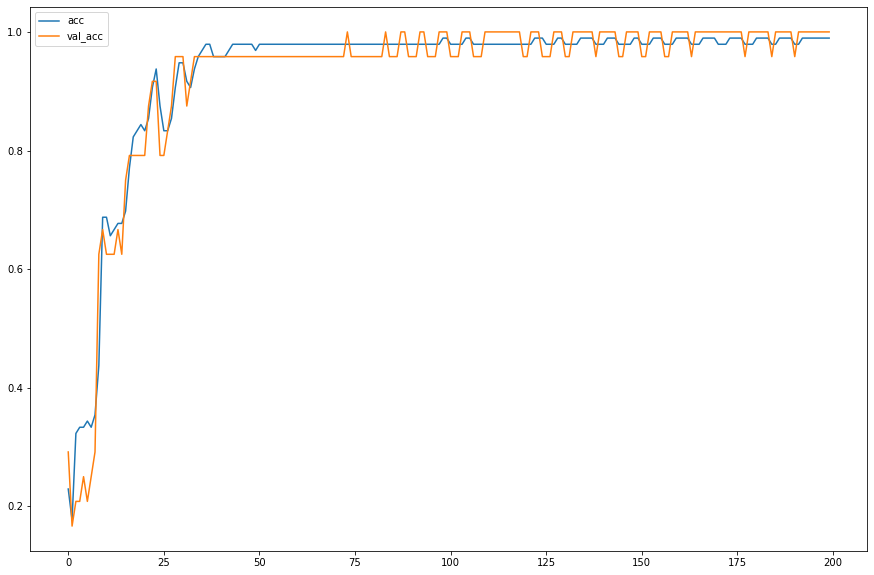

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()